### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
!pip install --upgrade tensorflow
!pip install joblib
!pip install yfinance

In [4]:
import yfinance as yf
stock = 'AAPL'
df = yf.download(stock, start='2019-08-05', end='2024-08-05')['Close']
df.to_csv('AAPL_5.csv')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head()

,Close
Date,
2019-08-05,48.334999
2019-08-06,49.250000
2019-08-07,49.759998
2019-08-08,50.857498
2019-08-09,50.247501


In [6]:
df.tail()

,Close
Date,
2024-07-29,218.240005
2024-07-30,218.800003
2024-07-31,222.080002
2024-08-01,218.360001
2024-08-02,219.860001


In [7]:
df1=df.reset_index()['Close']

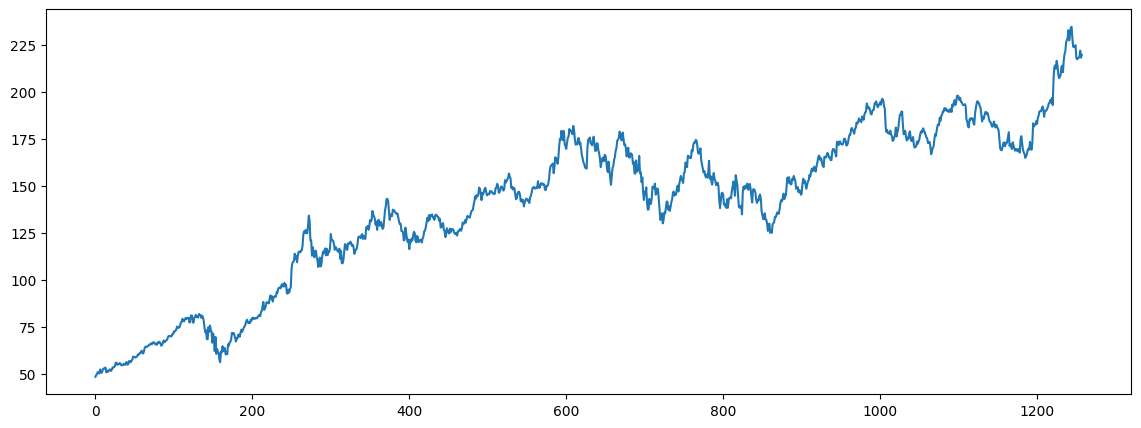

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.        ]
 [0.00490657]
 [0.00764136]
 ...
 [0.93168349]
 [0.9117355 ]
 [0.91977904]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(754, 504)

In [13]:
train_data

array([[0.        ],
       [0.00490657],
       [0.00764136],
       [0.01352655],
       [0.01025553],
       [0.00957181],
       [0.02095343],
       [0.01261496],
       [0.01126097],
       [0.01764217],
       [0.02280345],
       [0.02281685],
       [0.0258734 ],
       [0.0256321 ],
       [0.01246749],
       [0.01762878],
       [0.0145052 ],
       [0.0163418 ],
       [0.02100705],
       [0.0206451 ],
       [0.0165697 ],
       [0.02124837],
       [0.02673137],
       [0.02670456],
       [0.0279245 ],
       [0.03131619],
       [0.04055286],
       [0.03988256],
       [0.03406441],
       [0.03560608],
       [0.03667855],
       [0.03945358],
       [0.03702712],
       [0.032697  ],
       [0.03402419],
       [0.03262996],
       [0.03712095],
       [0.03559268],
       [0.03415826],
       [0.04106229],
       [0.04189345],
       [0.03434594],
       [0.03683944],
       [0.04513767],
       [0.04520471],
       [0.04163873],
       [0.04516449],
       [0.049

In [14]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape)
print(y_train.shape)

(653, 100)
(653,)


In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
# from sklearn.base import BaseEstimator, RegressorMixin
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
#     def __init__(self, units=50, optimizer='adam', epochs=10, batch_size=32, verbose=1):
#         self.units = units
#         self.optimizer = optimizer
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.verbose = verbose
#         self.model = None

#     def build_model(self):
#         model = Sequential()
#         model.add(LSTM(self.units, return_sequences=True, input_shape=(time_step, 1)))
#         model.add(Dropout(0.2))
#         model.add(LSTM(self.units, return_sequences=True))
#         model.add(Dropout(0.2))
#         model.add(LSTM(self.units))
#         model.add(Dropout(0.2))
#         model.add(Dense(1))
#         model.compile(loss='mean_squared_error', optimizer=self.optimizer)
#         return model

#     def fit(self, X, y):
#         self.model = self.build_model()
#         self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
#         return self

#     def predict(self, X):
#         return self.model.predict(X)

# # Now use this custom wrapper in your GridSearchCV
# model = KerasRegressorWrapper(verbose=1)

# param_grid = {
#     'units': [50, 100, 150],
#     'batch_size': [32, 64, 128],
#     'epochs': [100,200],
#     'optimizer': ['adam','sgd']
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
# best_model = grid_result.best_estimator_


In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(time_step,1)))
model.add(Dropout(0.2))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 150)            │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452,551 (1.73 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0458 - val_loss: 0.0019
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017 - val_loss: 0.0044
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

In [22]:
import joblib
joblib.dump(model,'AMZN_5.pkl')

['AMZN_5.pkl']

In [23]:
import joblib
model = joblib.load('AMZN_5.pkl')

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics for train
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

131.29699949267376

In [27]:
### Calculate RMSE performance metrics for test
math.sqrt(mean_squared_error(y_test,test_predict))

178.89417663176934

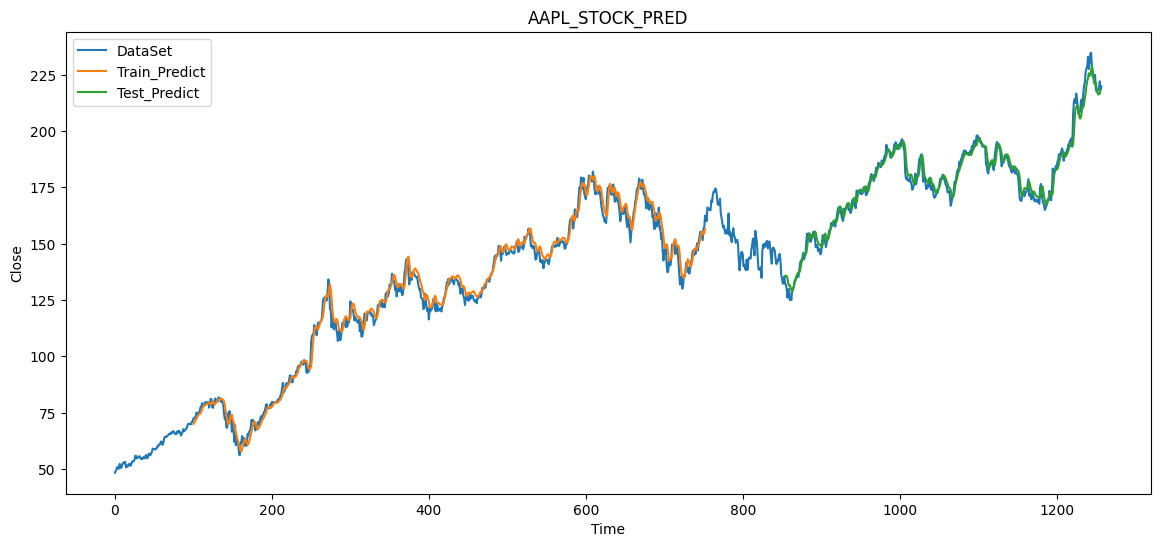

In [28]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(14,6))
plt.plot(scaler.inverse_transform(df1))
plt.title(f'{stock}_STOCK_PRED')
plt.xlabel('Time')
plt.ylabel('Close')
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['DataSet','Train_Predict','Test_Predict'])
plt.show()

In [29]:
len(test_data)

504

In [30]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
len(temp_input)

100

In [33]:
# demonstrate prediction for next X days
from numpy import array
X=30
lst_output=[]
n_steps=time_step
i=0
while(i<X):

    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9079593]
101
1 day input [0.65847119 0.66849878 0.66646106 0.67235969 0.68501487 0.69890336
 0.65975811 0.66463788 0.65696974 0.65085665 0.6701611  0.66034797
 0.65257256 0.64619134 0.65053484 0.64608415 0.65015952 0.64410002
 0.65064211 0.64050725 0.67943796 0.68753518 0.66683646 0.64908706
 0.64168698 0.63653907 0.62559989 0.63010426 0.63578835 0.64715661
 0.65182184 0.64865806 0.67117996 0.65418129 0.64865806 0.66865965
 0.72416012 0.71520499 0.71890495 0.72072821 0.73054134 0.72239053
 0.73971093 0.74587762 0.75815747 0.75880093 0.75896179 0.76523574
 0.77226051 0.76448502 0.74292838 0.75955166 0.75960533 0.76121397
 0.76657634 0.77172424 0.78126923 0.78298523 0.79113596 0.78368228
 0.79660559 0.77638947 0.85162339 0.88336864 0.88964259 0.88025846
 0.90267309 0.88991065 0.86519016 0.85344665 0.85693216 0.8619192
 0.88433383 0.88889187 0.87023079 0.90310209 0.92197763 0.92884144
 0.95452712 0.96246347 0.96707502 0.99013319 0.96112288 0.97704902
 0.99774774 1.         0.96814756 0

In [34]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+1+X)

In [35]:
len(df1)

1258

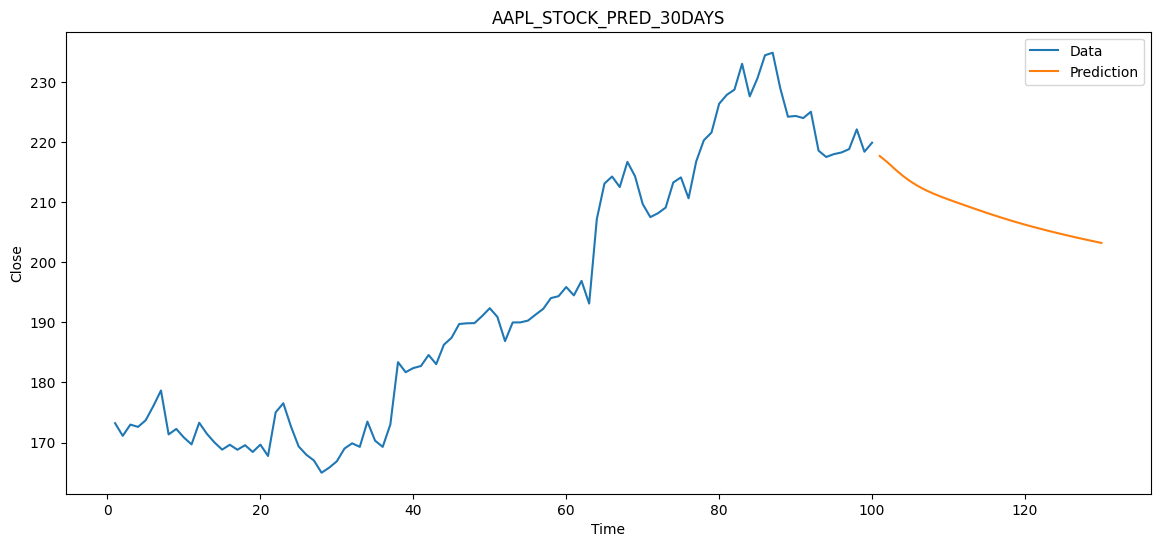

In [36]:
plt.figure(figsize=(14,6))
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title(f'{stock}_STOCK_PRED_30DAYS')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend(['Data','Prediction'])
plt.show()

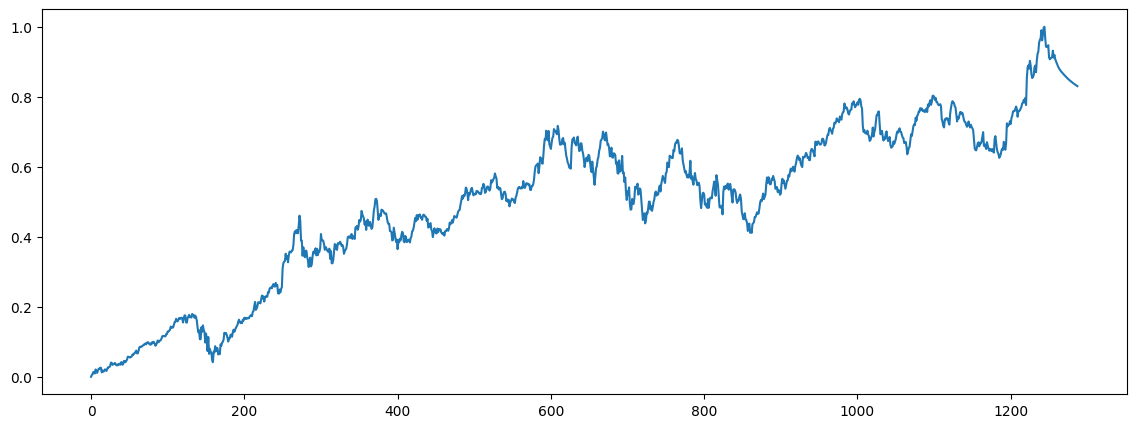

In [37]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(14,5))
plt.plot(df3)
plt.show()

In [38]:
df3=scaler.inverse_transform(df3).tolist()

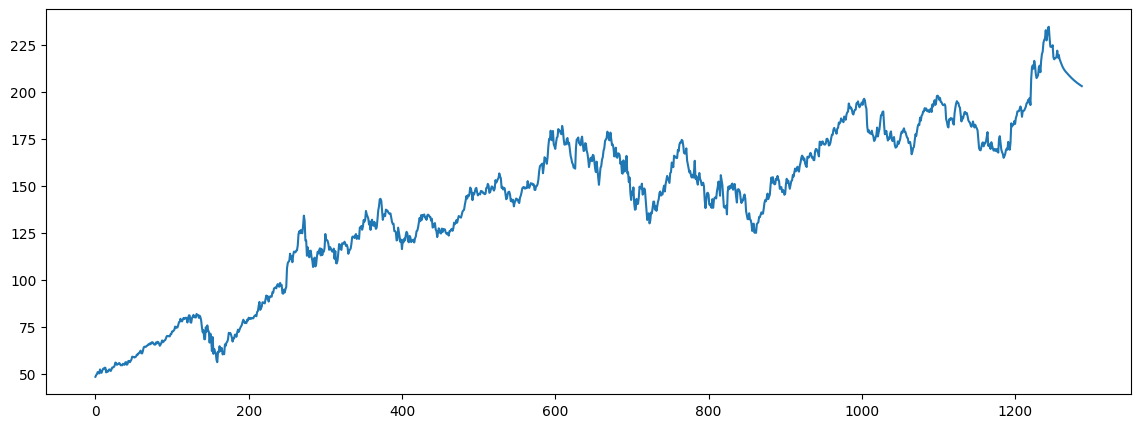

In [39]:
plt.figure(figsize=(14,5))
plt.plot(df3)
plt.show()